## Create and test ion channel model

In [1]:
from experiments.ina_courtemanche import (sakakibara_iv,
                                    sakakibara_act,
                                    sakakibara_inact,
                                    sakakibara_inact_kin_1,
                                    sakakibara_inact_kin_2,
                                    sakakibara_recov,
                                    sakakibara_recov_kin)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pyabc import Distribution, RV
import os, tempfile
import logging
from pyabc.populationstrategy import AdaptivePopulationSize, ConstantPopulationSize
from ionchannelABC import theoretical_population_size
from pyabc import ABCSMC
from pyabc.epsilon import MedianEpsilon
from pyabc.sampler import MulticoreEvalParallelSampler, SingleCoreSampler
from ionchannelABC import IonChannelDistance, EfficientMultivariateNormalTransition, IonChannelAcceptor
from pyabc import History
from ionchannelABC import plot_sim_results
import seaborn as sns
from ionchannelABC import plot_parameters_kde
from ionchannelABC.experiment import setup

INFO:myokit:Loading Myokit version 1.28.4


In [2]:
modelfile = 'models/Courtemanche_iNa.mmt'

In [3]:
observations, model, summary_statistics = setup(modelfile,
                                                sakakibara_iv,
                                                sakakibara_act,
                                                sakakibara_inact,
                                                sakakibara_inact_kin_1,
                                                sakakibara_inact_kin_2,
                                                sakakibara_recov,
                                                sakakibara_recov_kin)

In [4]:
assert len(observations)==len(summary_statistics(model({})))

In [18]:
tryList = [-5,-2,-1,0,1,4]
max(10,2)

10

## Set limits and generate uniform initial priors

In [5]:

limits = {'ina.c1_h': (0,50),
          'ina.a1_h': (-10,10),
          'ina.a2_h': (0,20),
          'ina.a3_h': (0,100),
          'ina.b1_h': (0,10),
          'ina.b2_h': (0,100),
          'ina.b3_h': (0,50),
          'ina.b4_h': (0,20),
          'ina.b5_h': (0.0001,1),
          'ina.b6_h': (0.000001,0.001),
          'ina.b7_h': (0,1)}

"""   
'ina.g_Na' : (0.01,100),
          'ina.a1_m': (0,100),
          'ina.a2_m': (-50,50),
          'ina.a3_m': (-50,50),
          'ina.a4_m': (-50,50),
          'ina.b1_m': (-50,50),
          'ina.b2_m': (0,100)


          'ina.c1_j': (0,100),
          'ina.a1_j': (100000,300000),
          'ina.a2_j': (0.0001,10),
          'ina.a3_j': (0.000001,0.001),
          'ina.a4_j': (0.0001,1),
          'ina.a5_j': (0,50),
          'ina.a6_j': (0.001,10),
          'ina.a7_j': (50,150),
          'ina.b1_j': (0.001,10),
          'ina.b2_j': (1e-8,1e-5),
          'ina.b3_j': (0.001,10),
          'ina.b4_j': (0,50),
          'ina.b5_j': (0.0001,1),
          'ina.b6_j': (0.0001,1),
          'ina.b7_j': (0.0001,1),
          'ina.b8_j': (20,70)}
"""
prior = Distribution(**{key: RV("uniform", a, b - a)
                        for key, (a,b) in limits.items()})

In [11]:
          
limits = {'ina.g_Na' : (0.01,100),
          'ina.a1_m': (0,100),
          'ina.a2_m': (-50,50),
          'ina.a3_m': (-50,50),
          'ina.a4_m': (-50,50),
          'ina.b1_m': (-50,50),
          'ina.b2_m': (0,100)}
            
prior = Distribution(**{key: RV("uniform", a, b - a)
                        for key, (a,b) in limits.items()})

## Run ABC calibration

In [6]:
db_path = ("sqlite:///" +
           os.path.join(tempfile.gettempdir(), "crm_ina_testing_gate_m.db"))

In [7]:
logging.basicConfig()
abc_logger = logging.getLogger('ABC')
abc_logger.setLevel(logging.DEBUG)
eps_logger = logging.getLogger('Epsilon')
eps_logger.setLevel(logging.DEBUG)

In [8]:
pop_size = theoretical_population_size(2, len(limits))
print("Theoretical minimum population size is {} particles".format(pop_size))

Theoretical minimum population size is 2048 particles


In [30]:

abc = ABCSMC(models=model,
             parameter_priors=prior,
             distance_function=IonChannelDistance(
                 exp_id=list(observations.exp_id),
                 variance=list(observations.variance),
                 delta=0.05),
             population_size=ConstantPopulationSize(1000), # Small pop to test
             summary_statistics=summary_statistics,
             transitions=EfficientMultivariateNormalTransition(),
             eps=MedianEpsilon(initial_epsilon=20),
             sampler=MulticoreEvalParallelSampler(n_procs=12),
             acceptor=IonChannelAcceptor())

DEBUG:ABC:ion channel weights: {'0': 1.2072150657413763, '1': 1.2072150657413763, '2': 1.2072150657413763, '3': 1.2072150657413763, '4': 1.2072150657413763, '5': 1.2072150657413763, '6': 1.2072150657413763, '7': 1.2072150657413763, '8': 1.2072150657413763, '9': 1.2072150657413763, '10': 1.2072150657413763, '11': 1.2072150657413763, '12': 1.2072150657413763, '13': 1.2072150657413763, '14': 1.2072150657413763, '15': 1.2072150657413763, '16': 1.2072150657413763, '17': 1.2072150657413763, '18': 0.45569535711195136, '19': 0.3545292012046639, '20': 0.44065462334321276, '21': 1.2072150657413763, '22': 1.2072150657413763, '23': 1.2072150657413763, '24': 1.2072150657413763, '25': 1.2072150657413763, '26': 1.4267087140579902, '27': 1.4267087140579902, '28': 1.4267087140579902, '29': 1.4267087140579902, '30': 1.4267087140579902, '31': 0.5338596646548436, '32': 0.33176258901227934, '33': 0.3674613844474347, '34': 0.9167388223930231, '35': 1.4267087140579902, '36': 1.4267087140579902, '37': 0.19848

In [31]:
obs = observations.to_dict()['y']
obs = {str(k): v for k, v in obs.items()}

In [32]:
abc_id = abc.new(db_path, obs)

INFO:History:Start <ABCSMC(id=1, start_time=2019-08-01 11:39:48.024542, end_time=None)>


In [33]:
history = abc.run(minimum_epsilon=0.1, max_nr_populations=20, min_acceptance_rate=0.005)

INFO:ABC:t:0 eps:20
DEBUG:ABC:now submitting population 0
DEBUG:ABC:population 0 done
DEBUG:ABC:
total nr simulations up to t =0 is 2365
DEBUG:Epsilon:new eps, t=1, eps=13.173486893851264
INFO:ABC:t:1 eps:13.173486893851264
DEBUG:ABC:now submitting population 1
DEBUG:ABC:population 1 done
DEBUG:ABC:
total nr simulations up to t =1 is 4704
DEBUG:Epsilon:new eps, t=2, eps=12.634607666266447
INFO:ABC:t:2 eps:12.634607666266447
DEBUG:ABC:now submitting population 2
DEBUG:ABC:population 2 done
DEBUG:ABC:
total nr simulations up to t =2 is 7478
DEBUG:Epsilon:new eps, t=3, eps=11.895465147374406
INFO:ABC:t:3 eps:11.895465147374406
DEBUG:ABC:now submitting population 3
DEBUG:ABC:population 3 done
DEBUG:ABC:
total nr simulations up to t =3 is 10882
DEBUG:Epsilon:new eps, t=4, eps=11.049720472602521
INFO:ABC:t:4 eps:11.049720472602521
DEBUG:ABC:now submitting population 4
DEBUG:ABC:population 4 done
DEBUG:ABC:
total nr simulations up to t =4 is 15373
DEBUG:Epsilon:new eps, t=5, eps=10.1603107607

# Results analysis

In [9]:
history = History(db_path)
history.all_runs()

[<ABCSMC(id=1, start_time=2019-07-31 17:18:22.665700, end_time=None)>,
 <ABCSMC(id=2, start_time=2019-07-31 17:22:28.063766, end_time=None)>,
 <ABCSMC(id=3, start_time=2019-07-31 17:25:59.342801, end_time=2019-08-01 04:00:02.140846)>]

/apps/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
/apps/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
/apps/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
/apps/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
/apps/anaconda3/

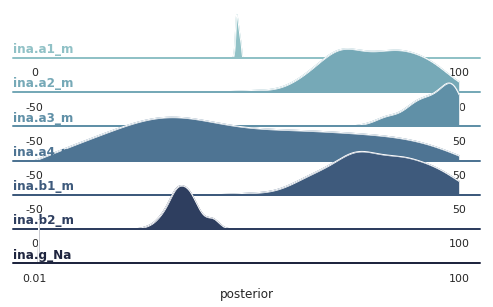

In [12]:

history.id = 3
df, w = history.get_distribution(m=0)

# Generate parameter samples
n_samples = 100
df, w = history.get_distribution(m=0)
th_samples = df.sample(n=n_samples, weights=w, replace=True).to_dict(orient='records')
plotting_obs = observations.copy()


grid2 = plot_parameters_kde(df, w, limits, aspect=12,height=0.6)

In [ ]:
grid1.savefig('../results/ina/Crm/ina_crm_posterior_sakakibara_exp_pop_1000.pdf')
grid2.savefig('../results/ina/Crm/ina_crm_experiments_sakakibara_exp_pop_1000.pdf')